In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/Case1_dataset.csv')

In [5]:
df.head()

           labels                                               text
0          Arabic  لا يزال هناك ما زال هناك لا يزال هناك الكثير م...
1000    Bulgarian  затова слагаме бял кедър в къщата и го оставим...
2000       German  tolles designe aber die gummis sind zu schnell...
3000        Greek  το aib παραδίδει πληροφορίες σε πραγματικό χρό...
4000      English  this lamp is ok but not what i expected for th...
5000      Spanish  una estrella porque no puedo dejarla sin estre...
6000       French  pour en avoir acheté deux supplémentaires pour...
7000        Hindi  नीचे के कमरे में स ् नान करने के लिए नीचे दिए ...
8000      Italian  le azioni mondiali diminuiscono prima della sc...
9000     Japanese  ハイサイクルでばらまくのにちょうど良いと思い購入。 が、他の弾では問題なかったが弾あがりが悪...
10000       Dutch  meer franse soldaten naar centraalafrikaanse r...
11000      Polish                       pies skacze z doku i do wody
12000  Portuguese                       um homem está a cortar relva
13000     Russian  богатые источни

In [6]:
X = df['text']
y= df['labels']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = (train_test_split(X, y, test_size=0.2))

## Naive Bayes: Baseline Model

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


model = make_pipeline(TfidfVectorizer(ngram_range=(1, 3), analyzer='char'), MultinomialNB())

model.fit(X_train, y_train)
pred_labels = model.predict(X_valid)

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_valid, pred_labels,digits=4)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Arabic     1.0000    1.0000    1.0000       201
   Bulgarian     0.9840    0.9946    0.9893       186
     Chinese     1.0000    1.0000    1.0000       210
       Dutch     1.0000    0.9643    0.9818       196
     English     0.8959    0.9950    0.9429       199
      French     0.9652    1.0000    0.9823       194
      German     0.9742    1.0000    0.9869       189
       Greek     1.0000    1.0000    1.0000       187
       Hindi     1.0000    0.9951    0.9976       206
     Italian     0.9899    0.9752    0.9825       202
    Japanese     1.0000    1.0000    1.0000       219
      Polish     1.0000    0.9731    0.9864       186
  Portuguese     1.0000    0.9179    0.9572       207
     Russian     0.9950    0.9852    0.9901       203
     Spanish     0.9216    1.0000    0.9592       188
     Swahili     0.9800    0.9423    0.9608       208
        Thai     1.0000    0.9952    0.9976       209
    

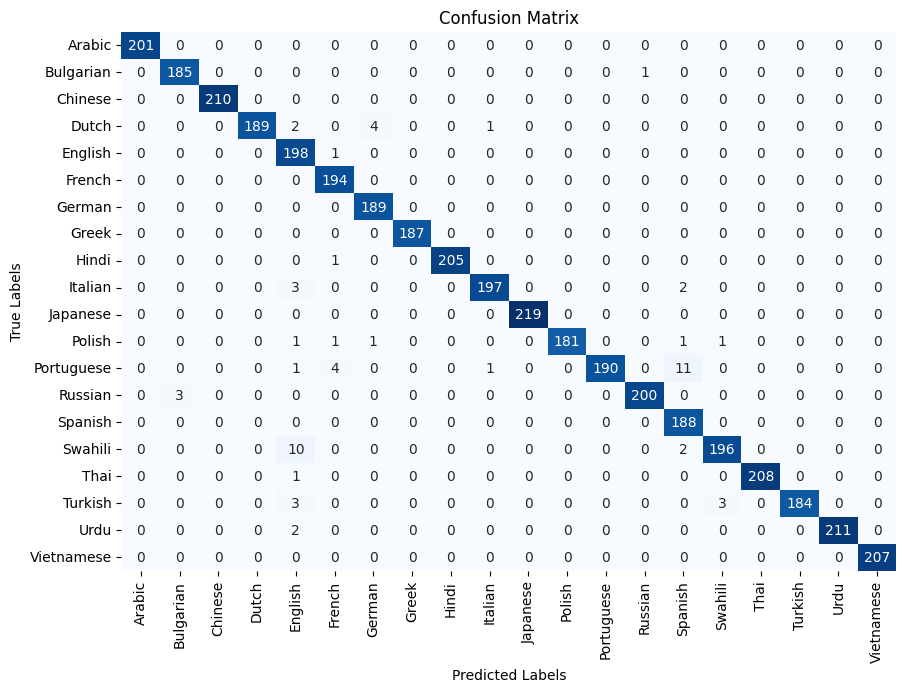

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = [
    'Arabic', 'Bulgarian', 'Chinese', 'Dutch', 'English', 'French', 'German',
    'Greek', 'Hindi', 'Italian', 'Japanese', 'Polish', 'Portuguese', 'Russian',
    'Spanish', 'Swahili', 'Thai', 'Turkish', 'Urdu', 'Vietnamese']


conf_matrix = confusion_matrix(y_valid, pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
model = make_pipeline(TfidfVectorizer(ngram_range=(1, 3), analyzer='word'), LogisticRegression())

model = model.fit(X_train, y_train)

pred_labels = model.predict(X_valid)
report = classification_report(y_valid, pred_labels,digits=4)

print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      Arabic     1.0000    0.9602    0.9797       201
   Bulgarian     0.9375    0.9677    0.9524       186
     Chinese     0.4447    0.9952    0.6147       210
       Dutch     0.9844    0.9643    0.9742       196
     English     0.9567    1.0000    0.9779       199
      French     0.9845    0.9845    0.9845       194
      German     1.0000    0.9841    0.9920       189
       Greek     1.0000    0.9519    0.9753       187
       Hindi     1.0000    0.9854    0.9927       206
     Italian     0.9899    0.9752    0.9825       202
    Japanese     0.9773    0.1963    0.3270       219
      Polish     0.9828    0.9194    0.9500       186
  Portuguese     0.9756    0.9662    0.9709       207
     Russian     0.9891    0.8966    0.9406       203
     Spanish     0.9639    0.9947    0.9791       188
     Swahili     0.9740    0.8990    0.9350       208
        Thai     1.0000    0.9809    0.9903       209
    

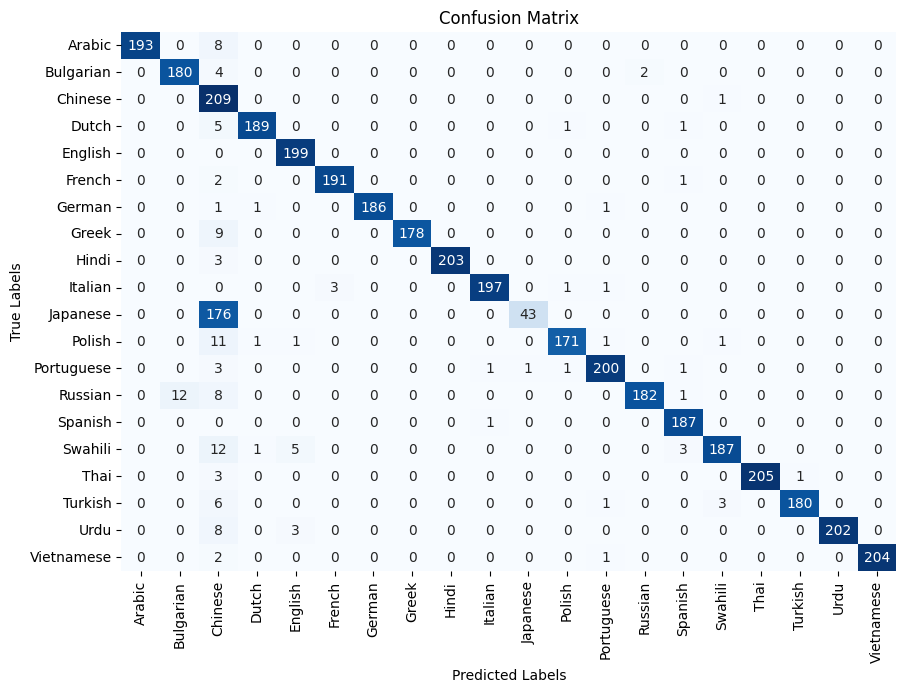

In [12]:
class_labels = ['Arabic', 'Bulgarian', 'Chinese', 'Dutch', 'English', 'French', 'German',
    'Greek', 'Hindi', 'Italian', 'Japanese', 'Polish', 'Portuguese', 'Russian',
    'Spanish', 'Swahili', 'Thai', 'Turkish', 'Urdu', 'Vietnamese']

conf_matrix = confusion_matrix(y_valid, pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Distil-BERT

In [13]:
from transformers import DistilBertTokenizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [14]:
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
valid_encodings = tokenizer(X_valid.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [15]:
import tensorflow as tf

train_labels = tf.convert_to_tensor(y_train.tolist())
valid_labels = tf.convert_to_tensor(y_valid.tolist())

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(1000).batch(32)
valid_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encodings), valid_labels)).batch(32)

In [17]:
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig

model_config = DistilBertConfig.from_pretrained('distilbert-base-multilingual-cased', num_labels=20)
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', config=model_config)

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(train_dataset, validation_data=valid_dataset, epochs=3)

y_pred = np.argmax(model.predict(valid_dataset).logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in valid_dataset], axis=0)

report = classification_report(y_true, y_pred, digits=4)
print('Classification Report:')
print(report)

Epoch 1/3
500/500 [==============================] - 241s 432ms/step - loss: 0.2452 - accuracy: 0.9775 - val_loss: 0.0313 - val_accuracy: 0.9935
Epoch 2/3
500/500 [==============================] - 221s 443ms/step - loss: 0.0236 - accuracy: 0.9954 - val_loss: 0.0206 - val_accuracy: 0.9962
Epoch 3/3
125/125 [==============================] - 18s 130ms/step
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       173
           1     1.0000    0.9888    0.9944       179
           2     1.0000    1.0000    1.0000       188
           3     1.0000    0.9897    0.9948       194
           4     0.9772    1.0000    0.9885       214
           5     1.0000    0.9953    0.9976       211
           6     0.9956    1.0000    0.9978       226
           7     1.0000    1.0000    1.0000       203
           8     1.0000    1.0000    1.0000       202
           9     0.9952    1.0000    0.9976       208
          10     1.0000 

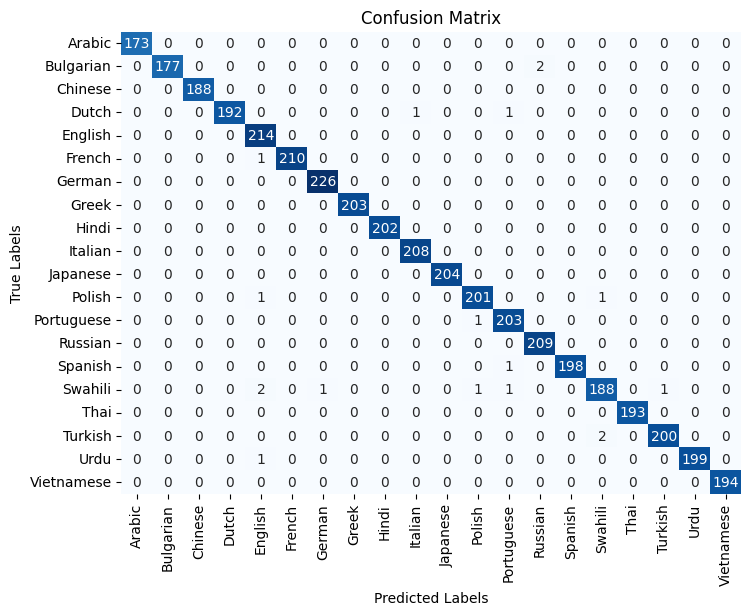

In [19]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

model.save_pretrained('/content/case1multilingual.csv')